## Analyzing Youtube Data

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [2]:
api_key='...'
channel_id =['UCnz-ZXXER4jOvuED5trXfEA',
            'UCLLw7jmFsvfIVaUFsLs8mlQ',
            'UC2UXDak6o7rBm23k3Vv5dww',
            'UC7cs8q-gJRlGwj4A8OmCmXg'
            ]

youtube = build('youtube','v3',developerKey=api_key)

In [3]:
## To extract channel detail


In [4]:
# def get_channel_stats(youtube,channel_id):
#     request=youtube.channels().list(
#         part='snippet,contentDetails,statistics',
#         id=','.join(channel_id)
#     )
#     response=request.execute()
#     data = dict(channel_name =response['items'][0]['snippet']['title'],
#                Subscribers=response['items'][0]['statistics']['subscriberCount'],
#                Views=response['items'][0]['statistics']['viewCount'],
#                Total_videos=response['items'][0]['statistics']['videoCount'])
#     return data

In [5]:
# get_channel_stats(youtube,channel_id)

In [6]:
## for Multiple channel

In [7]:
def get_channel_stats(youtube,channel_id):
    all_data=[]
    request=youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(channel_id)
    )
    response=request.execute()
    
    for i in range(len(response['items'])):
        data = dict(channel_name =response['items'][i]['snippet']['title'],
                   Subscribers=response['items'][i]['statistics']['subscriberCount'],
                   Views=response['items'][i]['statistics']['viewCount'],
                   Total_videos=response['items'][i]['statistics']['videoCount'],
                   playlist_id=response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)
    return all_data

In [8]:
channel_stats = get_channel_stats(youtube,channel_id)

In [9]:
## COnvert to dataframe

In [10]:
import pandas as pd

In [11]:
df=pd.DataFrame(channel_stats)

In [12]:
df

,channel_name,Subscribers,Views,Total_videos,playlist_id
0,techTFQ,333000,18629770,137,UUnz-ZXXER4jOvuED5trXfEA
1,Alex The Analyst,882000,40590038,326,UU7cs8q-gJRlGwj4A8OmCmXg
2,Tina Huang,679000,31770044,229,UU2UXDak6o7rBm23k3Vv5dww
3,Luke Barousse,471000,23320594,158,UULLw7jmFsvfIVaUFsLs8mlQ


In [13]:
 df.dtypes

channel_name    object
Subscribers     object
Views           object
Total_videos    object
playlist_id     object
dtype: object

In [14]:
df['Subscribers']=pd.to_numeric(df['Subscribers'])
df['Views']=pd.to_numeric(df['Views'])
df['Total_videos']=pd.to_numeric(df['Total_videos'])

df.dtypes

channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

In [15]:
## Visualiztion

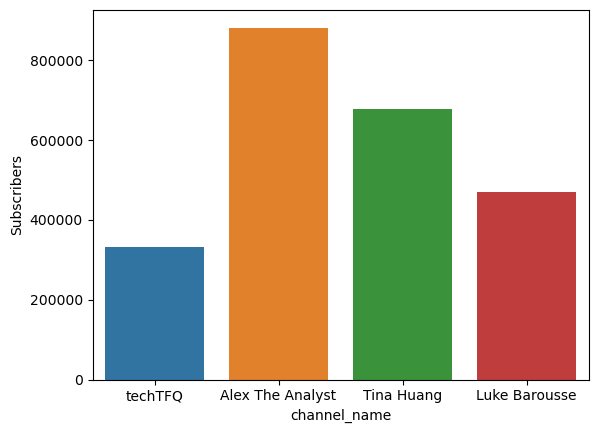

In [16]:
ax=sns.barplot(x='channel_name',y='Subscribers',data=df)

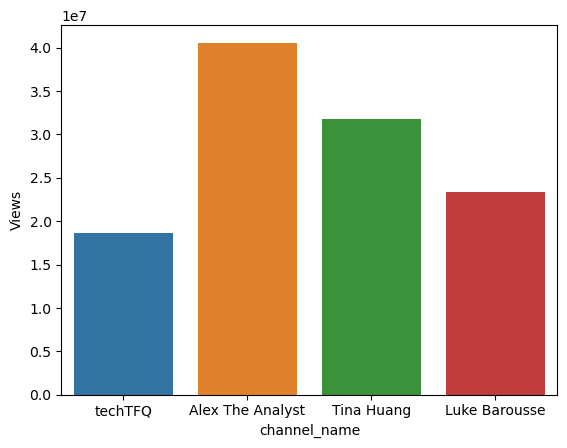

In [17]:
ax=sns.barplot(x='channel_name',y='Views',data=df)

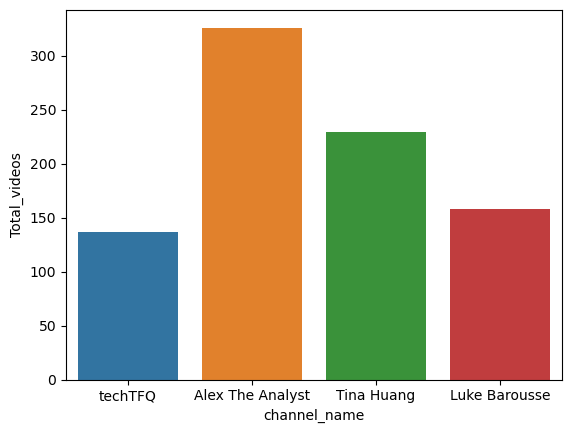

In [18]:
ax=sns.barplot(x='channel_name',y='Total_videos',data=df)

In [19]:
## Scrape , Analyze  and visualize video 

In [20]:
## Fetch the Video_id for channel

In [21]:
df

,channel_name,Subscribers,Views,Total_videos,playlist_id
0,techTFQ,333000,18629770,137,UUnz-ZXXER4jOvuED5trXfEA
1,Alex The Analyst,882000,40590038,326,UU7cs8q-gJRlGwj4A8OmCmXg
2,Tina Huang,679000,31770044,229,UU2UXDak6o7rBm23k3Vv5dww
3,Luke Barousse,471000,23320594,158,UULLw7jmFsvfIVaUFsLs8mlQ


In [22]:
playlist_id = df.loc[df['channel_name']=='techTFQ','playlist_id'].iloc[0]

In [23]:
playlist_id

'UUnz-ZXXER4jOvuED5trXfEA'

In [24]:
def get_video_ids(youtube,playlist_id):
    video_ids=[]
    request=youtube.playlistItems().list(
            part='contentDetails',
            playlistId=playlist_id,
            maxResults=50
        )
    response = request.execute()
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    next_page_token=response.get('nextPageToken')
    more_pages=True
    while more_pages:
        if next_page_token is None:
            more_pages=False
        else:
            request=youtube.playlistItems().list(
                    part='contentDetails',
                    playlistId=playlist_id,
                    maxResults=50,
                    pageToken=next_page_token)
            response = request.execute()
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token=response.get('nextPageToken')    
    
    return video_ids

In [25]:
video_ids = get_video_ids(youtube,playlist_id)

In [26]:
## function to extract detail from each videos

In [27]:
def get_video_details(youtube,video_ids):
    all_video_stats=[]
    for i in range(0,len(video_ids),50):
        request = youtube.videos().list(
                part='snippet,statistics',
                id =','.join(video_ids[i:i+50]))
        response=request.execute()
        for video in response['items']:
            video_stats=dict(Title=video['snippet']['title'],
                           published_date=video['snippet']['publishedAt'],
                             Views = video['statistics']['viewCount'],
                             Likes = video['statistics']['likeCount'],
                             Comments = video['statistics']['commentCount']
                            )
            all_video_stats.append(video_stats)
    
    return all_video_stats
    

In [28]:
video_details= get_video_details(youtube,video_ids)

In [29]:
df1 = pd.DataFrame(video_details)

In [30]:
df1

,Title,published_date,Views,Likes,Comments
0,Solving the most complex SQL Problem on LeetCo...,2024-09-18T13:19:22Z,11341,459,38
1,SQL Case Study - Bike Rental Shop | Practice S...,2024-09-10T12:58:51Z,11692,471,35
2,Learn Basic SQL in 3.5 hrs | Complete SQL Begi...,2024-08-30T13:00:08Z,56178,1975,102
3,Amazon Interview | SQL Interview Problem asked...,2024-06-23T13:46:24Z,28328,1006,105
4,Super Interesting SQL Problem | Practice SQL Q...,2024-06-03T12:30:07Z,23573,860,58
...,...,...,...,...,...
132,How to install PostgreSQL on Mac OS | Install ...,2020-11-16T02:28:09Z,146937,1174,130
133,Learn What is Database | Types of Database | DBMS,2020-08-30T00:38:24Z,478648,7447,193
134,Do you need a Smartwatch,2020-07-12T15:32:36Z,11800,185,43
135,MacBook Pro 13 2020 One Week Later Review,2020-06-29T15:03:19Z,1566,73,20


In [31]:
## Data Preprocessing

In [32]:
df1['published_date']=pd.to_datetime(df1['published_date']).dt.date
df1['Views']=pd.to_numeric(df1['Views'])
df1['Likes']=pd.to_numeric(df1['Likes'])
df1

,Title,published_date,Views,Likes,Comments
0,Solving the most complex SQL Problem on LeetCo...,2024-09-18,11341,459,38
1,SQL Case Study - Bike Rental Shop | Practice S...,2024-09-10,11692,471,35
2,Learn Basic SQL in 3.5 hrs | Complete SQL Begi...,2024-08-30,56178,1975,102
3,Amazon Interview | SQL Interview Problem asked...,2024-06-23,28328,1006,105
4,Super Interesting SQL Problem | Practice SQL Q...,2024-06-03,23573,860,58
...,...,...,...,...,...
132,How to install PostgreSQL on Mac OS | Install ...,2020-11-16,146937,1174,130
133,Learn What is Database | Types of Database | DBMS,2020-08-30,478648,7447,193
134,Do you need a Smartwatch,2020-07-12,11800,185,43
135,MacBook Pro 13 2020 One Week Later Review,2020-06-29,1566,73,20


In [33]:
## Top 10 video of channel

In [34]:
top10 = df1.sort_values(by='Views',ascending=False).head(10)

In [35]:
top10

,Title,published_date,Views,Likes,Comments
105,Learn how to write SQL Queries(Practice Comple...,2021-08-22,1599387,35443,1145
131,SQL Basics Tutorial for Beginners (Practice SQ...,2020-12-11,1250684,25778,743
113,SQL Window Function | How to write SQL Query u...,2021-05-21,1084173,32302,1483
89,Subquery in SQL | Correlated Subquery + Comple...,2022-02-01,1076870,23994,1299
91,SQL JOINS Tutorial for beginners | Practice SQ...,2022-01-06,1021888,22529,1239
55,How to learn SQL for free | Roadmap to learnin...,2022-12-28,949080,24014,628
95,Top 25 SQL Interview Questions and Answers(The...,2021-12-01,852810,26479,640
128,How to Install Python on Mac OS and How to Run...,2021-01-11,640544,7974,388
103,SQL WITH Clause | How to write SQL Queries usi...,2021-09-05,579481,13714,671
58,Solving SQL Interview Query for Data Analyst a...,2022-12-07,503960,11076,337


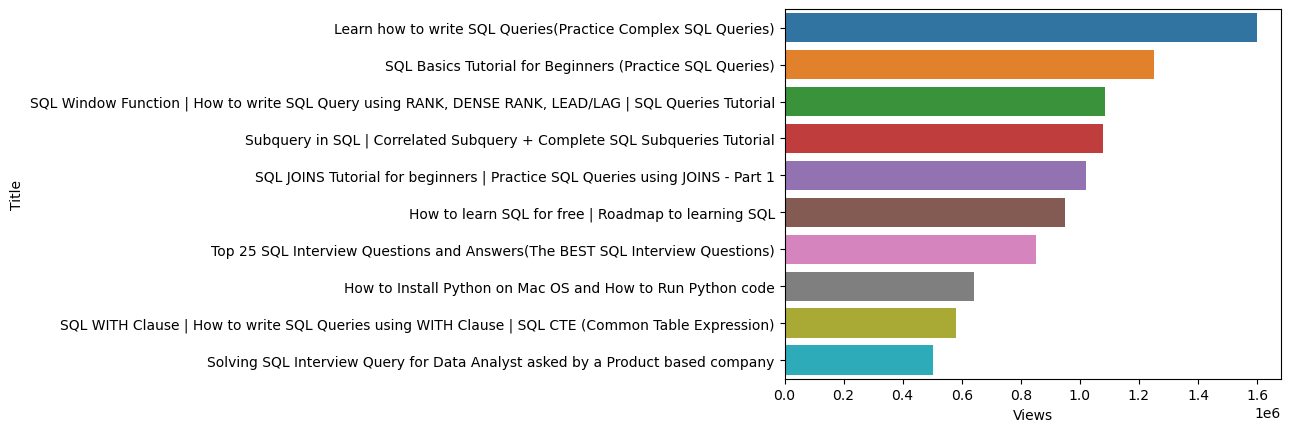

In [36]:
ax1 = sns.barplot(x='Views',y='Title',data=top10)

In [37]:
## On Average each month how many video Posted

In [38]:
df1['Month']=pd.to_datetime(df1['published_date']).dt.strftime('%b')

In [39]:
df1

,Title,published_date,Views,Likes,Comments,Month
0,Solving the most complex SQL Problem on LeetCo...,2024-09-18,11341,459,38,Sep
1,SQL Case Study - Bike Rental Shop | Practice S...,2024-09-10,11692,471,35,Sep
2,Learn Basic SQL in 3.5 hrs | Complete SQL Begi...,2024-08-30,56178,1975,102,Aug
3,Amazon Interview | SQL Interview Problem asked...,2024-06-23,28328,1006,105,Jun
4,Super Interesting SQL Problem | Practice SQL Q...,2024-06-03,23573,860,58,Jun
...,...,...,...,...,...,...
132,How to install PostgreSQL on Mac OS | Install ...,2020-11-16,146937,1174,130,Nov
133,Learn What is Database | Types of Database | DBMS,2020-08-30,478648,7447,193,Aug
134,Do you need a Smartwatch,2020-07-12,11800,185,43,Jul
135,MacBook Pro 13 2020 One Week Later Review,2020-06-29,1566,73,20,Jun


In [40]:
videos_per_month=df1.groupby('Month',as_index=False).size()

In [41]:
videos_per_month

,Month,size
0,Apr,2
1,Aug,11
2,Dec,10
3,Feb,9
4,Jan,9
5,Jul,5
6,Jun,11
7,Mar,42
8,May,8
9,Nov,6


In [42]:
# Drop 'Month' from the index if it exists there
videos_per_month = videos_per_month.reset_index(drop=True)

# Define the correct sort order
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the 'Month' column to a categorical type with the specified sort order
videos_per_month['Month'] = pd.Categorical(videos_per_month['Month'], categories=sort_order, ordered=True)

# Sort by the 'Month' column
videos_per_month_sorted = videos_per_month.sort_values('Month')

# Display the sorted DataFrame
print(videos_per_month_sorted)


   Month  size
4    Jan     9
3    Feb     9
7    Mar    42
0    Apr     2
8    May     8
6    Jun    11
5    Jul     5
1    Aug    11
11   Sep    16
10   Oct     8
9    Nov     6
2    Dec    10


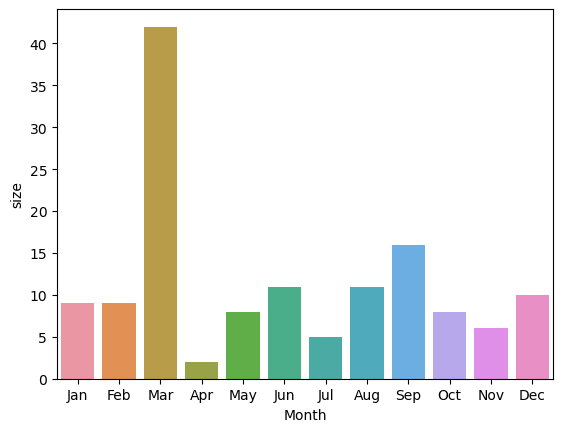

In [43]:
ax2=sns.barplot(x='Month',y='size',data=videos_per_month_sorted)

##  sentiment anaylsis

In [1]:
import requests

url = "https://youtube-v31.p.rapidapi.com/search"

querystring = {"relatedToVideoId":"7ghhRHRP6t4","part":"id,snippet","type":"video","maxResults":"50"}

headers = {
	"x-rapidapi-key": "9bee0d7d4bmsh8c537ea77fbe7aep1b7a53jsn156e36fd806b",
	"x-rapidapi-host": "youtube-v31.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'kind': 'youtube#searchListResponse', 'nextPageToken': 'CBQSDRILN2doaFJIUlA2dDQYACqwFTJzNkw2d3o5RHdyNkR3b0Q4ajRBQ2c3Q1Bnc0kyX0Q4ek02ZjhlTElBUW9Pd2o0TENLajhqOW5sNko2MTRnRUtEY0ktQ2dqWjVLNk5ncnp5a2lRS0RzSS1Dd2laa3NhWjJybkVwTTRCQ2c3Q1Bnc0lzYkdFdE11N29ON2ZBUW9Pd2o0TENJXzhqZnlha01pVTJRRUtEY0ktQ2dpMWs0SGh6T0M5bkNnS0RjSS1DZ2oxMWZ6NHpjQ3Y4V01LRHNJLUN3amFfOVRWODdma3dZSUJDZzdDUGdzSTlxaUY4TVR3NlBDMUFRb093ajRMQ0xiWnZZcm12Skh0M3dFS0RjSS1DZ2lWaGNlZjI1NnlqMzRLRGNJLUNnalMzLXpfMS1MbnoxWUtEY0ktQ2dpZTZmbl9sTjY1aW0wS0RzSS1Dd2pCdm9hM2pyT0tfYTRCQ2czQ1Bnb0l3Sl92ck9lbXZzMU1DZzdDUGdzSWs0YjZ5WnFEcHFEaUFRb093ajRMQ0picjRQci15NzZObndFS0RjSS1DZ2pLajRTVnVPU1EzWE1LRGNJLUNnakNqWnZ1MF9fVTFDSUtEc0ktQ3dqNzZ1VzdfSzdGd3RJQkNnN0NQZ3NJenREN19wem52dFh1QVFvTndqNEtDUF9ycTdqYThKR1ZDQW9Od2o0S0NQLWhrUDZuenFTZ2F3b053ajRLQ0lDZjZ2R3Y1SkhjYndvT3dqNExDSXVZNXItRmxiN0RnQUVLRHNJLUN3akVvOXVWb3AtZHJmMEJDZzNDUGdvSXJzQ2M4YWZMbWUxekNnN0NQZ3NJOHRDcjZ1aWYtNHlaQVFvTndqNEtDUHJkOF9DSGdiTEdSQW9EOGo0QUNocWFQeGNLRlU5OE9EZzFNRFl4TVRBNE5qTXlNRGd4TnpRMU1

In [10]:
import requests
import time
import pandas as pd
from datetime import datetime
import random

def get_channel_videos(channel_id, api_key, max_results=50):
    url = "https://youtube-v31.p.rapidapi.com/search"
    
    querystring = {
        "channelId": channel_id,
        "part": "snippet,id",
        "order": "date",
        "maxResults": str(max_results)
    }
    
    headers = {
        "X-RapidAPI-Key": api_key,
        "X-RapidAPI-Host": "youtube-v31.p.rapidapi.com"
    }
    
    response = requests.get(url, headers=headers, params=querystring)
    
    if response.status_code == 200:
        return response.json()
    elif response.status_code == 429:
        print(f"Rate limit exceeded. Waiting before retrying...")
        time.sleep(60)  # Wait for 60 seconds before retrying
        return get_channel_videos(channel_id, api_key, max_results)  # Retry the request
    else:
        print(f"Error fetching videos for channel {channel_id}: {response.status_code}")
        return None

def get_video_comments(video_id, api_key):
    url = "https://youtube-v31.p.rapidapi.com/commentThreads"
    
    querystring = {
        "part": "snippet",
        "videoId": video_id,
        "maxResults": "100"
    }
    
    headers = {
        "X-RapidAPI-Key": api_key,
        "X-RapidAPI-Host": "youtube-v31.p.rapidapi.com"
    }
    
    response = requests.get(url, headers=headers, params=querystring)
    
    if response.status_code == 200:
        return response.json()
    elif response.status_code == 429:
        print(f"Rate limit exceeded for video {video_id}. Waiting before retrying...")
        time.sleep(60)  # Wait for 60 seconds before retrying
        return get_video_comments(video_id, api_key)  # Retry the request
    elif response.status_code == 403:
        print(f"Comments are disabled for video {video_id}")
        return None
    else:
        print(f"Error fetching comments for video {video_id}: {response.status_code}")
        return None

def extract_video_ids(channel_data):
    video_ids = []
    if channel_data and 'items' in channel_data:
        for item in channel_data['items']:
            if item['id']['kind'] == 'youtube#video':
                video_ids.append(item['id']['videoId'])
    return video_ids

def extract_comments(comments_data, channel_id, video_id):
    extracted_comments = []
    
    if comments_data and 'items' in comments_data:
        for item in comments_data['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            extracted_comments.append({
                'channel_id': channel_id,
                'video_id': video_id,
                'author': comment['authorDisplayName'],
                'text': comment['textDisplay'],
                'likes': comment['likeCount'],
                'published_at': comment['publishedAt']
            })
    
    return extracted_comments

def main():
    api_key ="9bee0d7d4bmsh8c537ea77fbe7aep1b7a53jsn156e36fd806a"
    channel_id = input("Enter the YouTube channel ID: ")
    num_videos = int(input("Enter the number of videos to extract comments from: "))
    
    all_comments = []
    
    print(f"Processing channel: {channel_id}")
    channel_data = get_channel_videos(channel_id, api_key, num_videos)
    
    if channel_data:
        video_ids = extract_video_ids(channel_data)
        
        for video_id in video_ids[:num_videos]:  # Limit to the specified number of videos
            print(f"  Processing video: {video_id}")
            comments_data = get_video_comments(video_id, api_key)
            
            if comments_data:
                comments = extract_comments(comments_data, channel_id, video_id)
                all_comments.extend(comments)
            
            # Sleep for a random time between 1 and 3 seconds
            time.sleep(random.uniform(1, 3))
    
    print(f"Finished processing channel: {channel_id}")
    print("=====================================")

    # Create DataFrame
    df = pd.DataFrame(all_comments)
    
    if not df.empty:
        # Convert 'published_at' to datetime
        df['published_at'] = pd.to_datetime(df['published_at'])
        
        # Sort by publication date
        df = df.sort_values('published_at', ascending=False)
        
        # Generate filename with current timestamp
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"youtube_comments_{channel_id}_{timestamp}.csv"
        
        # Save to CSV
        df.to_csv(filename, index=False, encoding='utf-8-sig')
        print(f"Comments saved to {filename}")
        
        # Print summary
        print("\nSummary:")
        print(f"Total comments extracted: {len(df)}")
        print(f"Total videos processed: {df['video_id'].nunique()}")
        print(f"Average comments per video: {len(df) / df['video_id'].nunique():.2f}")
    else:
        print("No comments were extracted. Please check your API key and rate limits.")

if __name__ == "__main__":
    main()

Enter the YouTube channel ID: UC-CSyyi47VX1lD9zyeABW3w
Enter the number of videos to extract comments from: 1
Processing channel: UC-CSyyi47VX1lD9zyeABW3w
  Processing video: 980SJ8KQFY4
Finished processing channel: UC-CSyyi47VX1lD9zyeABW3w
Comments saved to youtube_comments_UC-CSyyi47VX1lD9zyeABW3w_20241013_172047.csv

Summary:
Total comments extracted: 100
Total videos processed: 1
Average comments per video: 100.00


In [45]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import emoji

# Download stopwords and word lists
nltk.download('stopwords')
nltk.download('opinion_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashwi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\ashwi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\opinion_lexicon.zip.


True

In [29]:

df = pd.read_csv('youtube_comments_UC-CSyyi47VX1lD9zyeABW3w_20241013_172047.csv')  # Replace with your file path
df.head() 

,channel_id,video_id,author,text,likes,published_at
0,UC-CSyyi47VX1lD9zyeABW3w,980SJ8KQFY4,@kuruvillathomas1892,Do a vedio about how you miserably failed abou...,0,2024-10-13 11:47:40+00:00
1,UC-CSyyi47VX1lD9zyeABW3w,980SJ8KQFY4,@NeilBeforeMeee,Bro is watching too much air crash investigation.,0,2024-10-13 11:44:15+00:00
2,UC-CSyyi47VX1lD9zyeABW3w,980SJ8KQFY4,@mynamestudy20,Please sir yotube chanel video banadijiye,0,2024-10-13 11:39:42+00:00
3,UC-CSyyi47VX1lD9zyeABW3w,980SJ8KQFY4,@sidballerino,"The first 15 minutes was intense, like a movie...",0,2024-10-13 11:37:11+00:00
4,UC-CSyyi47VX1lD9zyeABW3w,980SJ8KQFY4,@Babudayal86,Bhaiya QNA video upload kar do jaldi please 🥺,0,2024-10-13 11:24:02+00:00


In [46]:
# Function to clean text and remove emojis
def clean_text_remove_emojis(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove user mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Remove emojis using emoji package
    text = emoji.replace_emoji(text, replace='')  # Replace with an empty string to remove emojis

    # Remove special characters, numbers, and punctuations
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text_remove_emojis)

# Display the cleaned text
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,Do a vedio about how you miserably failed abou...,do a vedio about how you miserably failed abou...
1,Bro is watching too much air crash investigation.,bro is watching too much air crash investigation
2,Please sir yotube chanel video banadijiye,please sir yotube chanel video banadijiye
3,"The first 15 minutes was intense, like a movie...",the first minutes was intense like a movie the...
4,Bhaiya QNA video upload kar do jaldi please 🥺,bhaiya qna video upload kar do jaldi please


In [48]:
from nltk.corpus import opinion_lexicon

# Get the positive and negative word lists from NLTK
positive_words = set(opinion_lexicon.words('positive-words.txt'))
negative_words = set(opinion_lexicon.words('negative-words.txt'))


In [51]:
# Function to calculate sentiment score based on word counts
def get_sentiment(text):
    # Tokenize the text into words
    words = text.split()

    # Count positive and negative words
    positive_count = sum(1 for word in words if word in positive_words)
    negative_count = sum(1 for word in words if word in negative_words)

    # Return a sentiment score (positive - negative)
    score = positive_count - negative_count

    return score

# Apply the custom sentiment function
df['sentiment_score'] = df['cleaned_text'].apply(get_sentiment)

# Assign sentiment labels based on the sentiment score
def sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(sentiment_label)

# Display the results
df[['cleaned_text', 'sentiment_score', 'sentiment_label']].head(50)


,cleaned_text,sentiment_score,sentiment_label
0,do a vedio about how you miserably failed abou...,-2,Negative
1,bro is watching too much air crash investigation,-1,Negative
2,please sir yotube chanel video banadijiye,0,Neutral
3,the first minutes was intense like a movie the...,0,Neutral
4,bhaiya qna video upload kar do jaldi please,0,Neutral
5,br br br br br br br,0,Neutral
6,ban loudspeakers on religious place,0,Neutral
7,useful thanks,1,Positive
8,thanks background sound content discriptive ef...,1,Positive
9,sir a video on zakir nail plz,0,Neutral


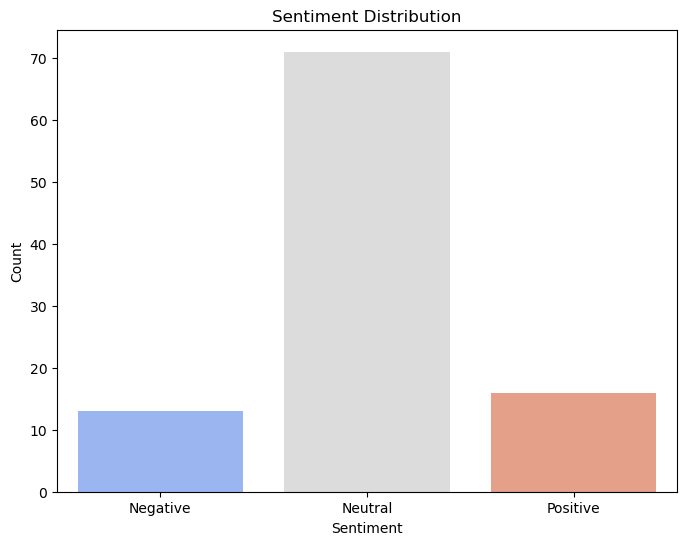

In [52]:
# Plot the sentiment label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


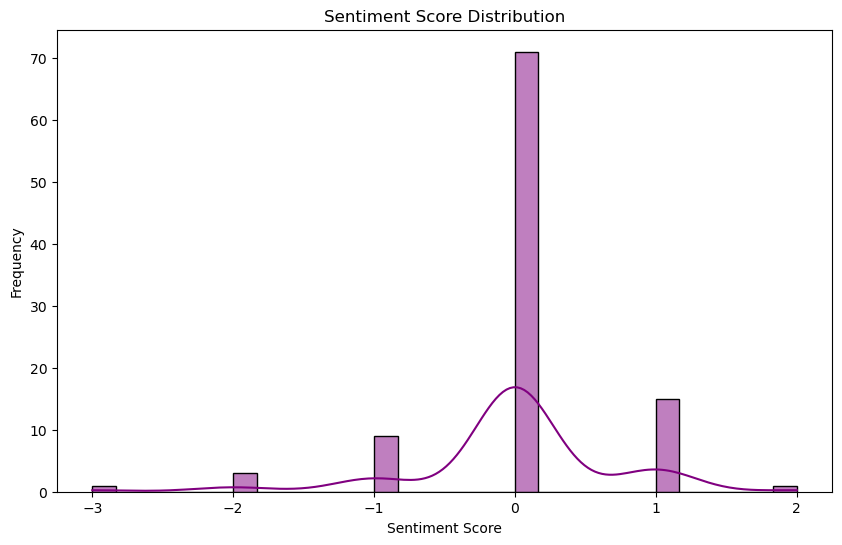

In [54]:
# Plot a histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=30, kde=True, color='purple')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()
